In [1]:
import torch
import matplotlib.pyplot as plt

Documentation reference: https://www.learnpytorch.io/01_pytorch_workflow/

## Agenda
In this notebook, we try to build a simple linear regression model using PyTorch library while convering all the major steps that are involved when building a typical ML/AI model.

## Steps involved

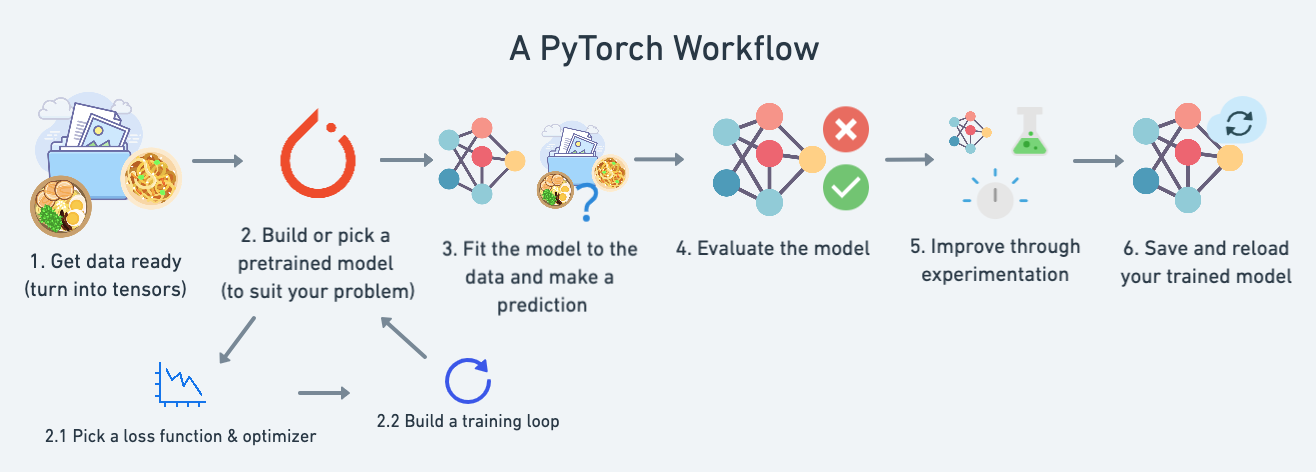

In [2]:
import requests
from io import BytesIO
from PIL import Image

response = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png")
Image.open(BytesIO(response.content))

## I. Dataset preparation

As we already know. In order to train a model, we first need to transform our data (could be images, audios, text, etc) into tensors. In this example, we will simply create the dataset tensor directly without using anything like images, audios, etc.

Dataset consists of two important types of variables,

1. Dependent variable:- Value that the model will predict (E.g:- Fruit).
2. Independent variables:- Inputs on which model will decide the dependent variable value (E.g: Sweetness, Price, Season, etc).

In [3]:
# INDEPENDENT VARIABLE
X = torch.arange(0, 100, 0.2)

# KNOWN PARAMETERS
weight = 0.7
bias = 0.3

# DEPENDENT VARIABLE
y = weight * X + bias

In [4]:
print("INDEPENDENT VARIABLE")
print(X)
print()
print("DEPENDENT VARIABLE")
print(y)

INDEPENDENT VARIABLE
tensor([ 0.0000,  0.2000,  0.4000,  0.6000,  0.8000,  1.0000,  1.2000,  1.4000,
         1.6000,  1.8000,  2.0000,  2.2000,  2.4000,  2.6000,  2.8000,  3.0000,
         3.2000,  3.4000,  3.6000,  3.8000,  4.0000,  4.2000,  4.4000,  4.6000,
         4.8000,  5.0000,  5.2000,  5.4000,  5.6000,  5.8000,  6.0000,  6.2000,
         6.4000,  6.6000,  6.8000,  7.0000,  7.2000,  7.4000,  7.6000,  7.8000,
         8.0000,  8.2000,  8.4000,  8.6000,  8.8000,  9.0000,  9.2000,  9.4000,
         9.6000,  9.8000, 10.0000, 10.2000, 10.4000, 10.6000, 10.8000, 11.0000,
        11.2000, 11.4000, 11.6000, 11.8000, 12.0000, 12.2000, 12.4000, 12.6000,
        12.8000, 13.0000, 13.2000, 13.4000, 13.6000, 13.8000, 14.0000, 14.2000,
        14.4000, 14.6000, 14.8000, 15.0000, 15.2000, 15.4000, 15.6000, 15.8000,
        16.0000, 16.2000, 16.4000, 16.6000, 16.8000, 17.0000, 17.2000, 17.4000,
        17.6000, 17.8000, 18.0000, 18.2000, 18.4000, 18.6000, 18.8000, 19.0000,
        19.2000, 19

### Visualizing the data

ML engineers make use of the 'matplotlib.pyplot' library for visualizing our data (can be input, output, etc) into insightful graphs. There is another library called 'seaborn' which can be used to visualize data into more complex forms such as heatmaps but we will not be using it as our dataset is quite simple.

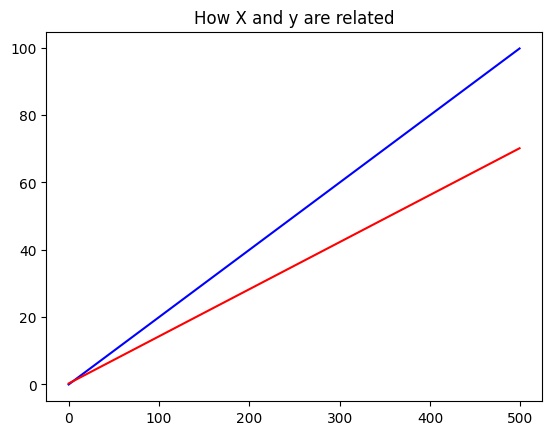

In [5]:
plt.plot(X, color='blue')
plt.plot(y, color='red')
plt.title("How X and y are related")
plt.show()

What can we conclude from the above graph?

1. X is directly proportional to y.
2. X is always greater than or equal to y.
3. X has a steeper slope as compare to y, indicating that as both the values increase, the gap between X and y grows larger and larger.

### Train-Test Split

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:

1. Train:-
  - Part of the dataset that is used to train the model.
  - 80-85% of the dataset.
2. Test:-
  - Part of the dataset that is kept hidden from the model and once the training finishes, is used to test how accurate the final model is.
  - 5-10% of the dataset.
3. Validation:-
  - Part of the dataset that is used to validate the models outputs after every epoch (One iteration over the training data).
  - Kind of like how students revise their concepts once they are done studying.
  - 5-10% of the dataset.

NOTE: If you are not using techniques like cross-validation or a test set early in development, a separate validation set is often necessary. In simpler setups like ours, we may skip validation if hyperparameter tuning isn't required.

In [6]:
# 80% TRAIN AND 20% TEST SPLIT
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train = X[:split_index]
y_train = y[:int(len(y)*split_ratio)]

X_test = X[split_index:]
y_test = y[int(len(y)*split_ratio):]

In [7]:
print(f"First {split_index}: Training set,")
print(len(X_train))
print(len(y_train))
print()
print(f"Remaining {int(len(X)) - split_index}: Test set,")
print(len(X_test))
print(len(y_test))

First 400: Training set,
400
400

Remaining 100: Test set,
100
100


In [8]:
y_train

tensor([ 0.3000,  0.4400,  0.5800,  0.7200,  0.8600,  1.0000,  1.1400,  1.2800,
         1.4200,  1.5600,  1.7000,  1.8400,  1.9800,  2.1200,  2.2600,  2.4000,
         2.5400,  2.6800,  2.8200,  2.9600,  3.1000,  3.2400,  3.3800,  3.5200,
         3.6600,  3.8000,  3.9400,  4.0800,  4.2200,  4.3600,  4.5000,  4.6400,
         4.7800,  4.9200,  5.0600,  5.2000,  5.3400,  5.4800,  5.6200,  5.7600,
         5.9000,  6.0400,  6.1800,  6.3200,  6.4600,  6.6000,  6.7400,  6.8800,
         7.0200,  7.1600,  7.3000,  7.4400,  7.5800,  7.7200,  7.8600,  8.0000,
         8.1400,  8.2800,  8.4200,  8.5600,  8.7000,  8.8400,  8.9800,  9.1200,
         9.2600,  9.4000,  9.5400,  9.6800,  9.8200,  9.9600, 10.1000, 10.2400,
        10.3800, 10.5200, 10.6600, 10.8000, 10.9400, 11.0800, 11.2200, 11.3600,
        11.5000, 11.6400, 11.7800, 11.9200, 12.0600, 12.2000, 12.3400, 12.4800,
        12.6200, 12.7600, 12.9000, 13.0400, 13.1800, 13.3200, 13.4600, 13.6000,
        13.7400, 13.8800, 14.0200, 14.16

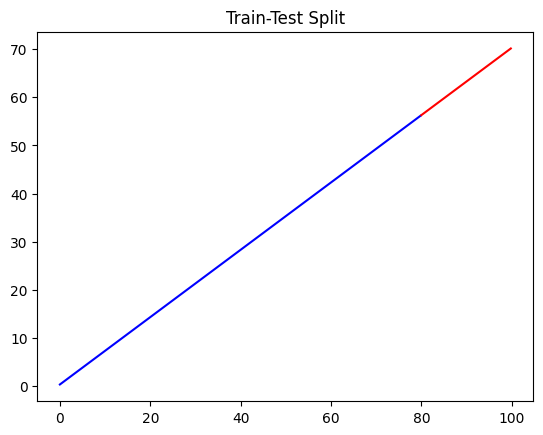

In [9]:
plt.plot(X_train, y_train, color='blue')
plt.plot(X_test, y_test, color='red')
plt.title("Train-Test Split")
plt.show()

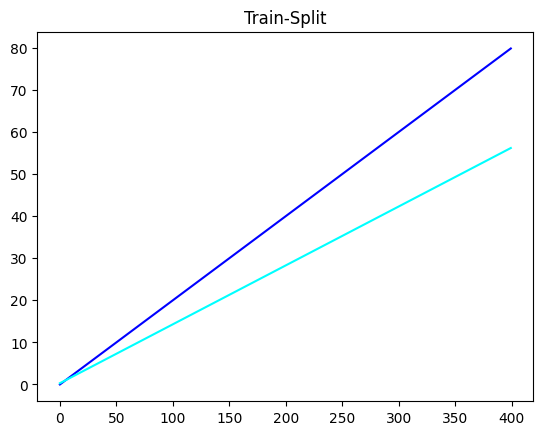

In [10]:
plt.plot(X_train, color='blue')
plt.plot(y_train, color='cyan')
plt.title("Train-Split")
plt.show()

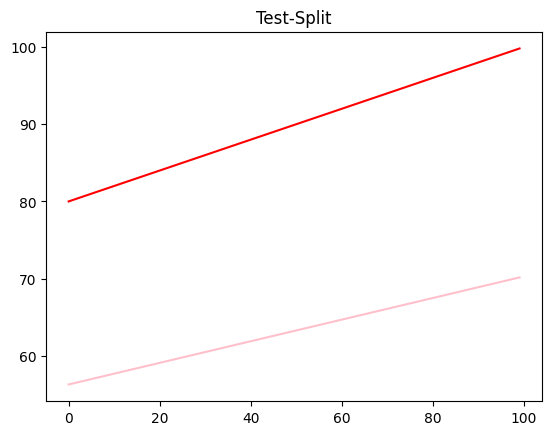

In [11]:
plt.plot(X_test, color='red')
plt.plot(y_test, color='pink')
plt.title("Test-Split")
plt.show()

## II. Building a Model

Now that we've got some data, let's build a model to use the training-set to train the model and test its accuracy using the test-set.

Let's replicate a standard linear regression model using pure PyTorch.



In [12]:
from torch import nn    # Contains the building blocks for creating neural networks in PyTorch

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### PyTorch model building essentials

|   PyTorch Module              |   Description                                                                                                                                                             |
|-------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `torch.nn`                     | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).                                         |
| `torch.nn.Parameter`           | Stores tensors that can be used with `nn.Module`. If `requires_grad=True`, gradients (used for updating model parameters via gradient descent) are calculated automatically. |
| `torch.nn.Module`              | The base class for all neural network modules. All building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| `torch.optim`                  | Contains various optimization algorithms. These tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and reduce the loss.     |
| `def forward()`                | All `nn.Module` subclasses require a `forward()` method. This defines the computation that will take place on the data passed to the particular `nn.Module`.                |


In [13]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# GETTING TEST SET RESULTS WITH BASE(UNTRAINED) MODEL
with torch.inference_mode():
  y_pred_base = model_0(X_test)

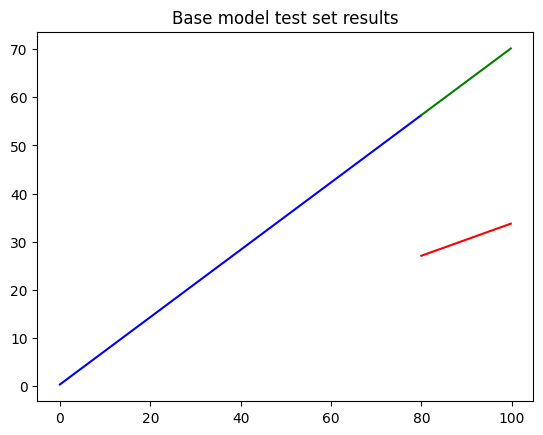

If the model was 100% accurate, the green and red lines would have overlapped each other.


In [15]:
plt.plot(X_train, y_train, color='blue')
plt.plot(X_test, y_test, color='green')
plt.plot(X_test, y_pred_base, color='red')
plt.title("Base model test set results")
plt.show()
print("If the model was 100% accurate, the green and red lines would have overlapped each other.")

## III. Train a model

Currently, the parameters that have been initialised in our model (the weights and bias values we set randomly using nn.Parameter() and torch.randn()) have random values. Thus, the model's output is also random and inaccurate. To fix that, we can update these parameters to be something that better represents the data. This is acheived by training the model on our dataset.

### Creating a loss function and optimizer in PyTorch

For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

| Function        | What does it do?                                                                                      | Where does it live in PyTorch?                 | Common values                                                                                   |
|-----------------|-------------------------------------------------------------------------------------------------------|-----------------------------------------------|-------------------------------------------------------------------------------------------------|
| Loss function   | Measures how wrong your model's predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in `torch.nn`. | Mean absolute error (MAE) for regression problems (`torch.nn.L1Loss()`). Binary cross entropy for binary classification problems (`torch.nn.BCELoss()`). |
| Optimizer       | Tells your model how to update its internal parameters to best lower the loss.                        | You can find various optimization function implementations in `torch.optim`. | Stochastic gradient descent (`torch.optim.SGD()`). Adam optimizer (`torch.optim.Adam()`).       |


In [16]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.0001) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

### Creating a training loop in PyTorch

For the training loop, we'll build the following steps:

| Number | Step name                          | What does it do?                                                                                                          | Code example                              |
|--------|------------------------------------|--------------------------------------------------------------------------------------------------------------------------|-------------------------------------------|
| 1      | Forward pass                       | The model goes through all of the training data once, performing its `forward()` function calculations.                   | `model(x_train)`                          |
| 2      | Calculate the loss                 | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.               | `loss = loss_fn(y_pred, y_train)`         |
| 3      | Zero gradients                     | The optimizer's gradients are set to zero (they are accumulated by default) so they can be recalculated for this step.    | `optimizer.zero_grad()`                   |
| 4      | Perform backpropagation on the loss| Computes the gradient of the loss with respect to every model parameter to be updated. Known as backpropagation.          | `loss.backward()`                         |
| 5      | Update the optimizer (gradient descent) | Update the parameters with `requires_grad=True` based on the loss gradients to improve the model.                         | `optimizer.step()`                        |


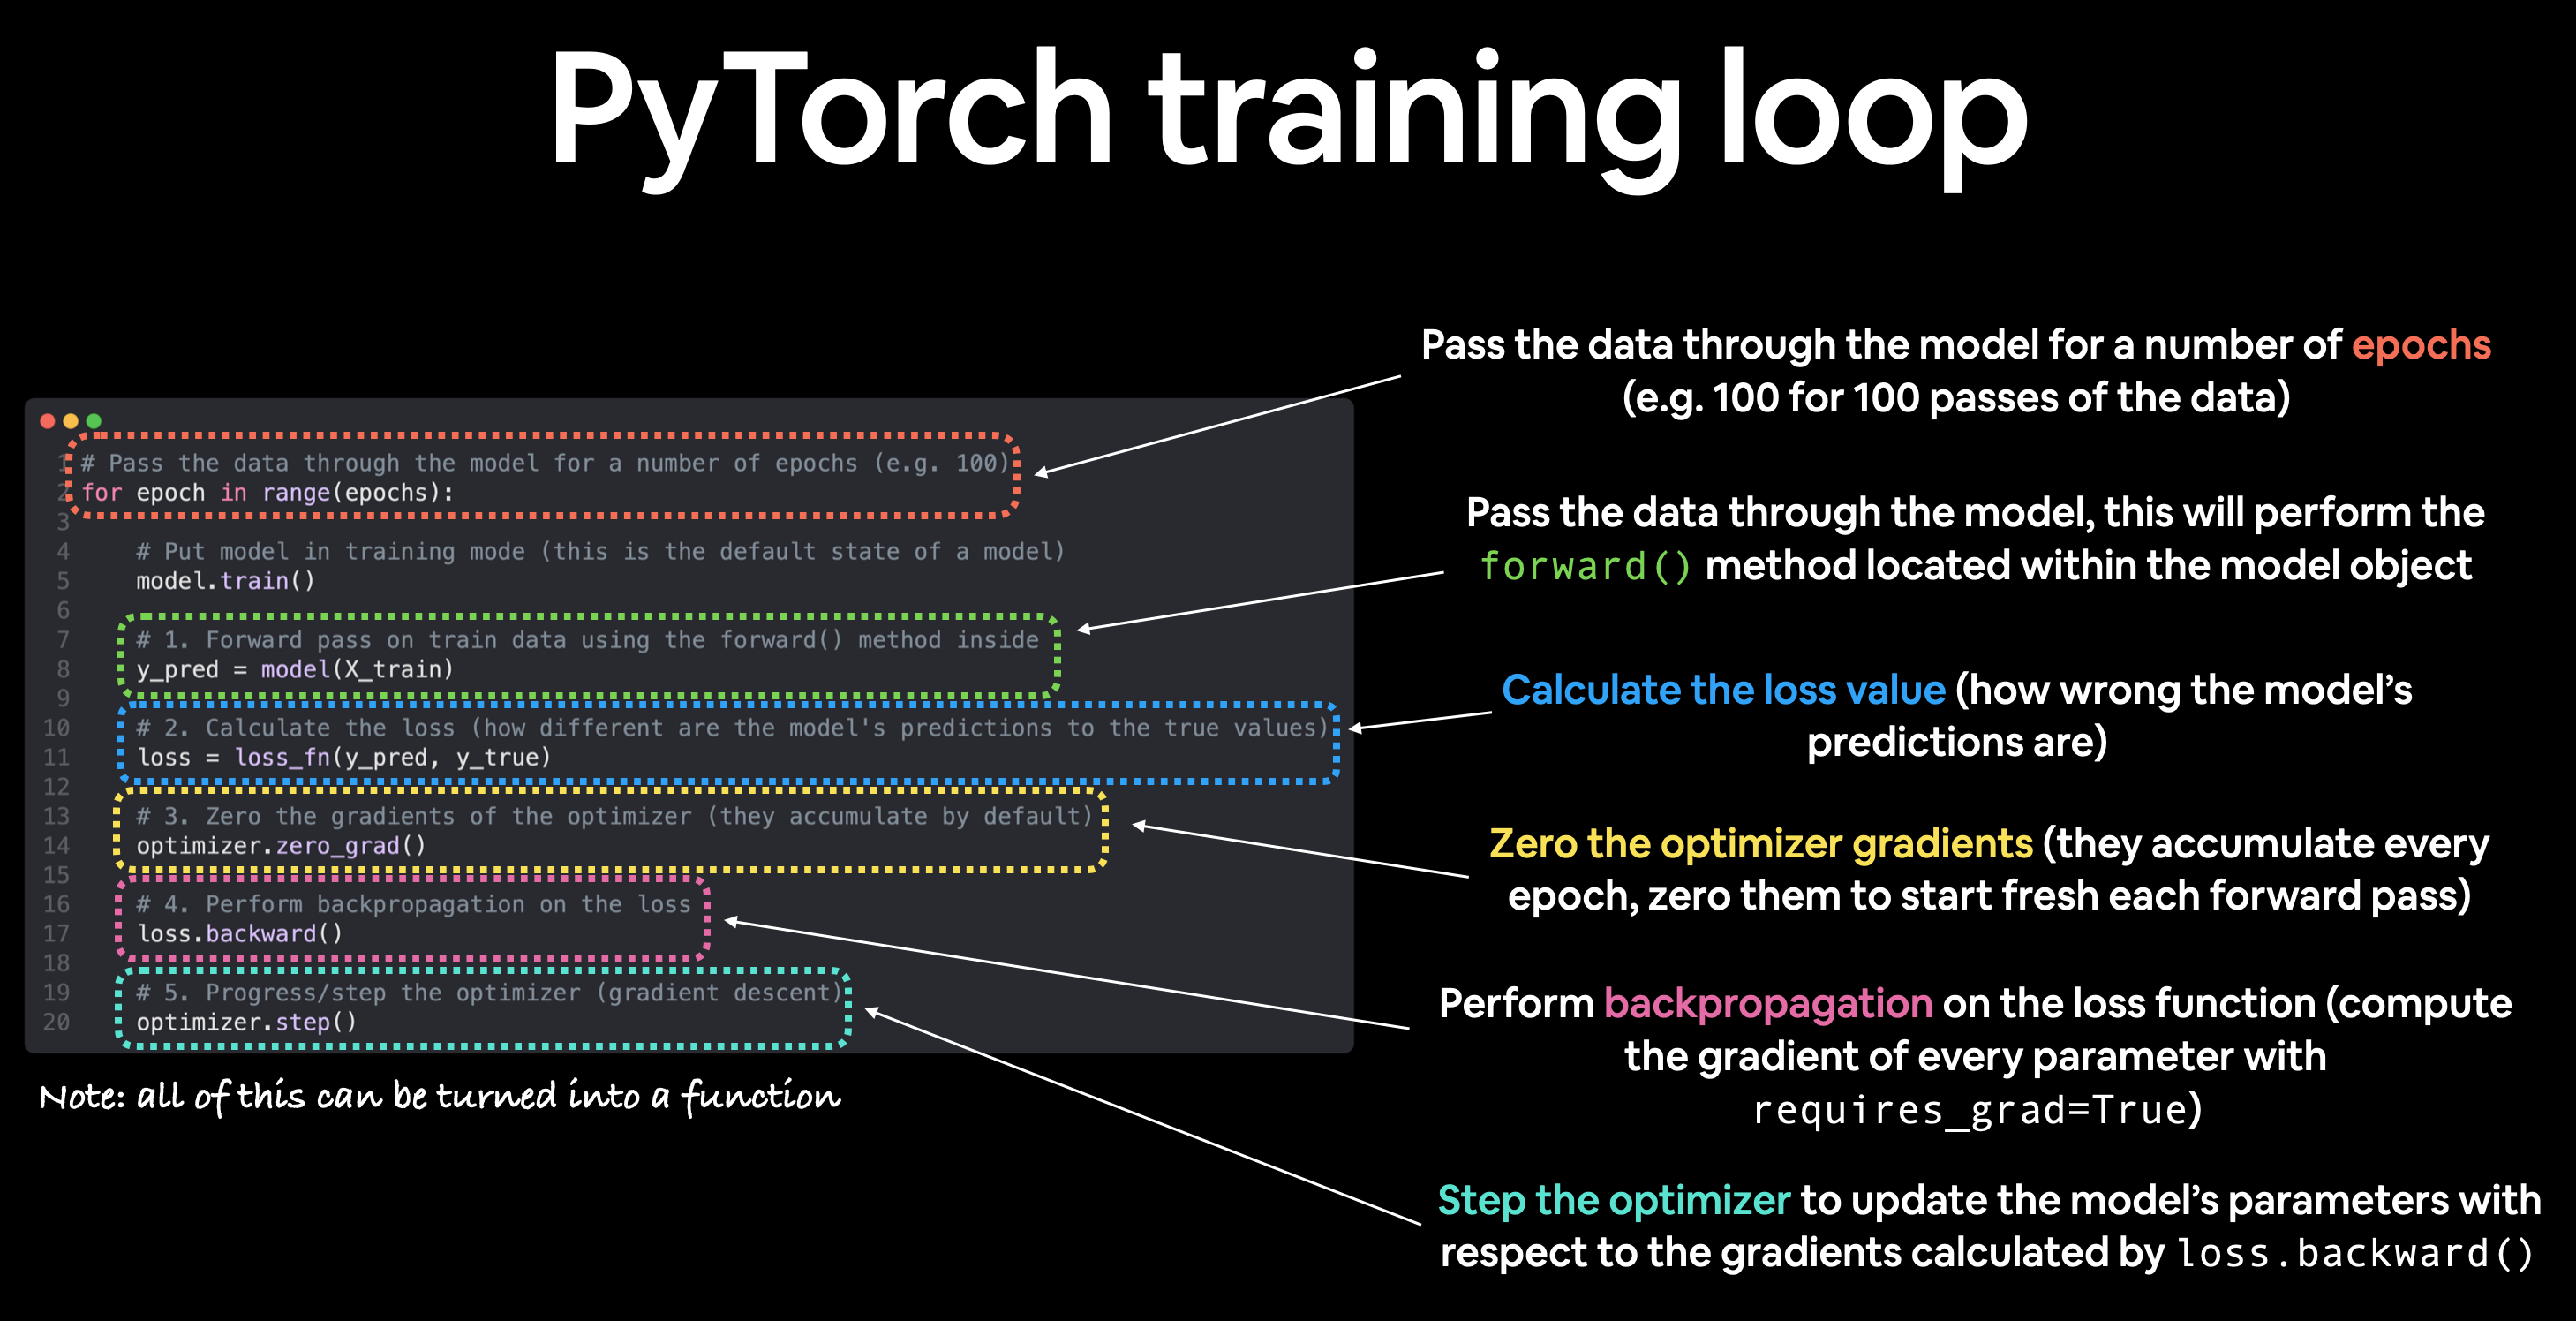

In [17]:
response = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png")
Image.open(BytesIO(response.content))

In [18]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

In [19]:
for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Log the results after every 10th epoch
      if epoch % 5 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 14.667244911193848 | MAE Test Loss: 32.47392654418945 
Epoch: 5 | MAE Train Loss: 13.87074089050293 | MAE Test Loss: 30.679922103881836 
Epoch: 10 | MAE Train Loss: 13.074235916137695 | MAE Test Loss: 28.88592529296875 
Epoch: 15 | MAE Train Loss: 12.277731895446777 | MAE Test Loss: 27.0919189453125 
Epoch: 20 | MAE Train Loss: 11.48122787475586 | MAE Test Loss: 25.29791831970215 
Epoch: 25 | MAE Train Loss: 10.684723854064941 | MAE Test Loss: 23.50391387939453 
Epoch: 30 | MAE Train Loss: 9.888219833374023 | MAE Test Loss: 21.709911346435547 
Epoch: 35 | MAE Train Loss: 9.091716766357422 | MAE Test Loss: 19.915908813476562 
Epoch: 40 | MAE Train Loss: 8.29521369934082 | MAE Test Loss: 18.12190818786621 
Epoch: 45 | MAE Train Loss: 7.498709201812744 | MAE Test Loss: 16.327905654907227 
Epoch: 50 | MAE Train Loss: 6.702204704284668 | MAE Test Loss: 14.533899307250977 
Epoch: 55 | MAE Train Loss: 5.905701160430908 | MAE Test Loss: 12.739897727966309 
Epoch: 60 

## IV. Evaluating the trained model

### Observing the loss curves

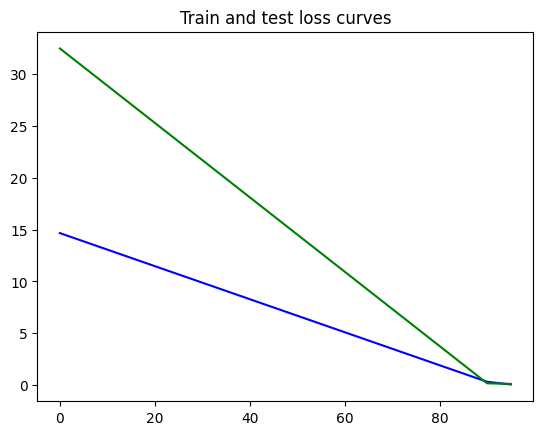

In [20]:
plt.plot(epoch_count, train_loss_values, color='blue')
plt.plot(epoch_count, test_loss_values, color='green')
plt.title("Train and test loss curves")
plt.show()

If we see a constant decrease in our loss values, it indicates that the training was a success.

### Base vs Trained model comparison

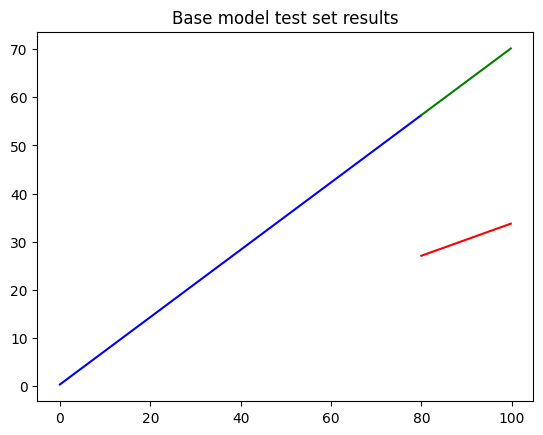

In [21]:
plt.plot(X_train, y_train, color='blue')
plt.plot(X_test, y_test, color='green')
plt.plot(X_test, y_pred_base, color='red')
plt.title("Base model test set results")
plt.show()

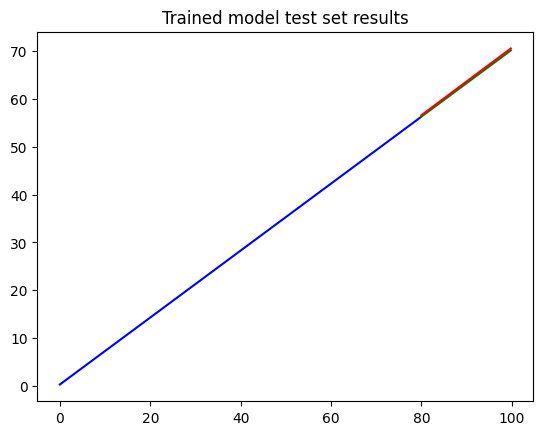

In [22]:
with torch.inference_mode():
  y_pred = model_0(X_test)

plt.plot(X_train, y_train, color='blue')
plt.plot(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red')
plt.title("Trained model test set results")
plt.show()

As can be seen in the graph above, the test and prediction outputs are pretty much the same. Hence we can conclude that the trained model is very accurate and ready to use.

## V. Saving and loading a PyTorch model

If you've trained a PyTorch model, chances are you'll want to save it and export it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it.

Or maybe you'd like to save your progress on a model and come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of:

| **PyTorch Method**                 | **What Does It Do?**                                                                                                                                                                                                                                   |
|-------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `torch.save`                        | Saves a serialized object to disk using Python's pickle utility. Models, tensors, and various other Python objects like dictionaries can be saved using `torch.save`.                                                                                  |
| `torch.load`                        | Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors, or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU, etc.).                                      |
| `torch.nn.Module.load_state_dict`   | Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object. This is typically used to restore the model's learned parameters after saving and loading the model.                                                  |


In [23]:
import os

In [24]:
# SAVING WHOLE MODEL
MODEL_SAVE_DIR = "/content/models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)
MODEL_SAVE_PATH = os.path.join(MODEL_SAVE_DIR, "model_0_trained.pth")
torch.save(obj=model_0, f=MODEL_SAVE_PATH)

In [25]:
# LOADING USING 'torch.load()'
trained_model = torch.load(MODEL_SAVE_PATH)
trained_model.state_dict()

<ipython-input-25-2a70282aee2b>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trained_model = torch.load(MODEL_SAVE_PATH)


OrderedDict([('weights', tensor([0.7057])), ('bias', tensor([0.1383]))])

NOTE: It is always recommended to save the model using 'state_dict()' because,

1. Can load into any model with same architecture.
2. Smaller size.

In [26]:
# SAVING ONLY 'state_dict()'
STATE_DICT_SAVE_DIR = "/content/models"
os.makedirs(STATE_DICT_SAVE_DIR, exist_ok=True)
STATE_DICT_SAVE_PATH = os.path.join(STATE_DICT_SAVE_DIR, "state_dict_0_trained.pth")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=STATE_DICT_SAVE_PATH)

In [27]:
# LOADING THE 'state.dict()' (NEED TO DEFINE MODEL ARCHITECTURE)
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


torch.manual_seed(42)
trained_model = LinearRegressionModel()
print(f"Model parameters before loading state_dict(): {trained_model.state_dict()}")
trained_model_state_dict = torch.load(STATE_DICT_SAVE_PATH)
trained_model.load_state_dict(trained_model_state_dict)
print(f"Model parameters after loading state_dict(): {trained_model.state_dict()}")

Model parameters before loading state_dict(): OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Model parameters after loading state_dict(): OrderedDict([('weights', tensor([0.7057])), ('bias', tensor([0.1383]))])


<ipython-input-27-6083bfe5c6b2>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trained_model_state_dict = torch.load(STATE_DICT_SAVE_PATH)


## Exercises

In [213]:
# IMPORTS AND CONSTANS
import os
import matplotlib.pyplot as plt
import torch
from torch import nn

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
WEIGHT = 0.9
BIAS = 0.3
SPLIT_RATIO = 0.8
LEARNING_RATE = 0.0002
EPOCHS = 300
MODEL_SAVE_DIR = "/content/exercise_results"

In [203]:
# DATASET CREATION
X = torch.arange(1, 101)
X.to(DEVICE)
y = WEIGHT * X + BIAS
y.to(DEVICE)
print(len(X), len(y))

100 100


In [204]:
# TRAIN-TEST SPLIT
train_split_size = int(len(X) * split_ratio)

X_train = X[:train_split_size]
y_train = y[:train_split_size]
X_test = X[train_split_size:]
y_test = y[train_split_size:]

print(len(X_train))
print(len(X_test))

80
20


Text(0.5, 1.0, 'Train-Test Split')

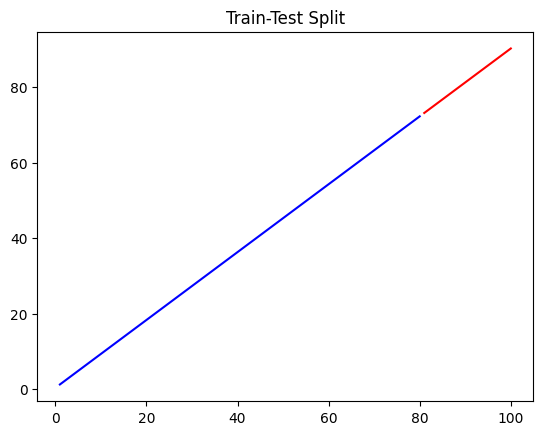

In [205]:
# VISUALIZATION
plt.plot(X_train, y_train, color="blue")
plt.plot(X_test, y_test, color="red")
plt.title("Train-Test Split")

In [206]:
# BUILDING THE MODEL
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, dtype=torch.float, requires_grad=True))
    self.bias = nn.Parameter(torch.rand(1, dtype=torch.float, requires_grad=True))

  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return X * self.weights + self.bias

In [207]:
torch.manual_seed(2)
lr_model = LinearRegression()
lr_model.state_dict()

OrderedDict([('weights', tensor([0.6147])), ('bias', tensor([0.3810]))])

In [208]:
# OPTIMIZER AND LOSS FUNCTION
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params=lr_model.parameters(), lr=LEARNING_RATE)

In [209]:
# TRAINING LOOP
def perform_training(model, epochs, loss_fn, optimizer, X_train, X_test, y_train, y_test):
  for epoch in range(epochs):
    model.train()
    y_pred_train = model(X_train)
    train_loss = loss_fn(y_pred_train, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
      y_pred_test = model(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      print(f"Epoch_{epoch+1} | training loss: {train_loss} | test loss: {test_loss}")

In [210]:
perform_training(
    lr_model,
    EPOCHS,
    loss_function,
    optimizer,
    X_train,
    X_test,
    y_train,
    y_test
)

Epoch_1 | training loss: 11.473836898803711 | test loss: 25.005834579467773
Epoch_2 | training loss: 11.145586013793945 | test loss: 24.272586822509766
Epoch_3 | training loss: 10.817337989807129 | test loss: 23.53934097290039
Epoch_4 | training loss: 10.48908805847168 | test loss: 22.806095123291016
Epoch_5 | training loss: 10.160840034484863 | test loss: 22.072847366333008
Epoch_6 | training loss: 9.83259105682373 | test loss: 21.339599609375
Epoch_7 | training loss: 9.504343032836914 | test loss: 20.60634994506836
Epoch_8 | training loss: 9.176094055175781 | test loss: 19.87310218811035
Epoch_9 | training loss: 8.847845077514648 | test loss: 19.13985824584961
Epoch_10 | training loss: 8.5195951461792 | test loss: 18.406606674194336
Epoch_11 | training loss: 8.191346168518066 | test loss: 17.673362731933594
Epoch_12 | training loss: 7.863097190856934 | test loss: 16.940113067626953
Epoch_13 | training loss: 7.534848690032959 | test loss: 16.206863403320312
Epoch_14 | training loss: 7

In [215]:
# SAVING THE MODEL (NOT STATE_DICT)
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)
MODEL_SAVE_PATH = os.path.join(MODEL_SAVE_DIR, "exercise_model.pth")
torch.save(lr_model, MODEL_SAVE_PATH)

In [216]:
# LOADING THE SAVED MODEL
lr_model = torch.load(MODEL_SAVE_PATH)

<ipython-input-216-097cfda538e6>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lr_model = torch.load(MODEL_SAVE_PATH)


0.9 0.3
OrderedDict([('weights', tensor([0.8993])), ('bias', tensor([0.3814]))])


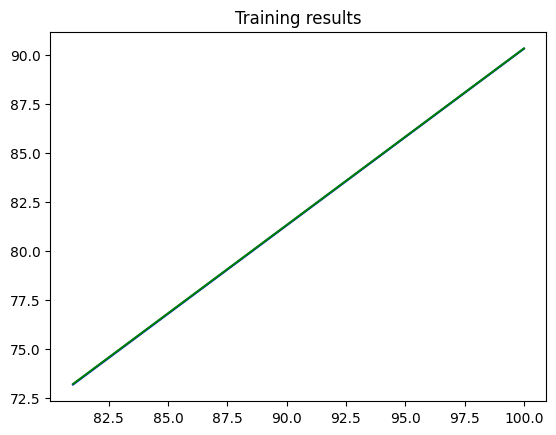

In [218]:
# TESTING THE MODEL
with torch.inference_mode():
  y_pred = lr_model(X_test)
  plt.plot(X_test, y_test, color="blue")
  plt.plot(X_test, y_pred, color="green")
  plt.title("Training results")

print(WEIGHT, BIAS)
print(lr_model.state_dict())